## RF with 3 categories: No matter, NS but no Remnant, NS and a remnant

In [1]:
import classyRF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

C:\Users\marin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import importlib
importlib.reload(classyRF)

<module 'classyRF' from 'C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\classyRF.py'>

In [3]:
pathREM = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\RM_dataset_NOPUBLIC\\"
pathBNS = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\NS_dataset_NOPUBLIC\\"
pathClassy = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\"
pathData = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\allEOS\\"

In [4]:
i_m1r=1; i_m2r=2; i_x1r=3; i_x2r=4; i_mcr=5; i_qr=6; i_Rr=7;
i_snr=8;
recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_mcr, i_qr, i_Rr, i_snr]
independent_recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_snr]

### Load the data and convert to the three categories

In [79]:
random.seed(42)
RF = classyRF.ClassificationRF()
RF.load_original_dataset(pathData, fname_x='original_data_APR4_EPP_s300_f0d7.csv')

N=int(len(RF.data_train_all));print(N, "total events")
test_N=int(np.floor(0.3*N)); print(test_N, "events for testing")

indexes_test=random.sample(list(np.arange(0,N)), test_N);
all_indexes=(np.arange(0,N)).tolist()
indexes_train=list(set(all_indexes) - set(indexes_test))


labelREM=RF.data_train_all[indexes_train,-1]
labelBNS=RF.data_train_all[indexes_train,-2]
RF.labels_train = labelREM+labelBNS

RF.data_test_all=RF.data_train_all[indexes_test,0:-2]
labelREM=RF.data_train_all[indexes_test,-1]
labelBNS=RF.data_train_all[indexes_test,-2]
RF.labels_test = labelREM+labelBNS

RF.data_train_all=RF.data_train_all[indexes_train,0:-2]

loaded
198961 total events
59688 events for testing


(array([68770., 90530., 39661.]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <a list of 3 Patch objects>)

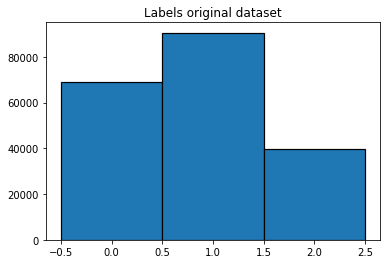

In [73]:
all_labels=RF.data_train_all[:,-1]+RF.data_train_all[:,-2]
bins = np.arange(4) - 0.5
plt.title("Labels original dataset")
plt.hist(all_labels,bins=bins,label="training set",  edgecolor='black', linewidth=1.2)

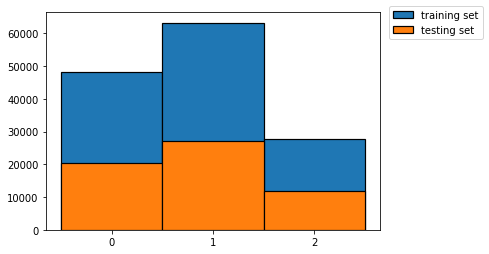

139273
Train:
label 0:  0.3463700789097671
label 1:  0.45444558528932383
label 2:  0.199184335800909
59688
Test:
label 0:  0.34395523388285754
label 1:  0.45633963275700307
label 2:  0.1997051333601394


In [74]:
bins = np.arange(4) - 0.5
plt.hist(RF.labels_train,bins=bins,label="training set",  edgecolor='black', linewidth=1.2)
plt.hist(RF.labels_test,bins=bins, label="testing set", edgecolor='black', linewidth=1.2)
plt.xticks([0,1,2])
plt.legend(bbox_to_anchor=(1.32, 1.05))
#plt.savefig("dataProportion.png",dpi=200,bbox_inches='tight')
plt.show()

N=len(RF.labels_train);print(N)
print("Train:");print("label 0: ",np.count_nonzero(RF.labels_train==0)/N);
print("label 1: ",np.count_nonzero(RF.labels_train==1)/N)
print("label 2: ",np.count_nonzero(RF.labels_train==2)/N)

N=len(RF.labels_test);print(N)
print("Test:");print("label 0: ",np.count_nonzero(RF.labels_test==0)/N);
print("label 1: ",np.count_nonzero(RF.labels_test==1)/N)
print("label 2: ",np.count_nonzero(RF.labels_test==2)/N)

# Train

In [82]:
#Doing: 500  trees, entropy criteria and  sqrt  max_features
RF.subset_features(independent_recovered_index)
RF.train(500, 'entropy', 'sqrt')
RF.saveModel(pathClassy,'APR4_EPP')

Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


In [85]:
RF.model.score(RF.data_test,RF.labels_test)

0.9645824956440155

# Load trained model

In [7]:
#Optimum forest found:  500  trees, entropy criteria and  sqrt  max_features
RF.loadModel(pathClassy, 'forest_3cat')
RF.subset_features(independent_recovered_index)

loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\forest_3cat.joblib
Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr


## Measure evaluation time

In [30]:
import time

In [36]:
event=[30,22,0.1,-0.6,11]
event=np.asarray(event)
event=event.reshape(1, -1)
times=[]
for k in range(0,23):
    t0=time.perf_counter()
    RF.model.predict(event)
    total_time=time.perf_counter()-t0
    times.append(total_time)
print("Mean time evaluating", np.mean(times), np.std(times),np.max(times),np.min(times), np.sum(times))

Mean time evaluating 0.02062150434782579 0.0025249147010092134 0.030127100000001406 0.018762899999998695 0.47429459999999324


In [35]:
events=RF.data_test[0:500]
t0=time.perf_counter()
RF.model.predict(events)
total_time=time.perf_counter()-t0
print(total_time, total_time/500)

0.08074080000000095 0.00016148160000000188


In [ ]:
t0=time.perf_counter()
RFrem.model.predict(RFrem.data_test)
total_time=time.perf_counter()-t0
print(total_time, total_time/len(RFrem.data_test))

## Line mass remnant = 0

In [37]:
outseq=np.loadtxt("outseq.d")
radius=outseq[:,0]
masses=outseq[:,2]

In [38]:
def Risco(chi1):
    z1=1+(1-chi1**2)**(1.0/3)*((1+chi1)**(1.0/3)+(1-chi1)**(1.0/3))
    z2=np.sqrt(3*chi1**2+z1**2)
    return 3+z2-np.sign(chi1)*np.sqrt((3-z1)*(3+z1+2*z2))

In [39]:
from scipy.optimize import fsolve
from scipy import interpolate

In [40]:
f = interpolate.interp1d(masses, radius,bounds_error=False, fill_value='extrapolate')
def R_km(m2):
    return f(m2)

In [41]:
alpha=0.406; beta=0.139; gamma=0.255; delta=1.761
factor=1.98847e30/(1e5*0.001)*(6.67408e-8/898755178736817640000.0)

def Mrem(m1, Risco):
    return lambda m2 : (alpha*(1-2*factor*m2/R_km(m2))/(m1/m2/(1+m1/m2)**2)**(1.0/3)-beta*Risco*factor*m2/R_km(m2)/((m1/m2/(1+m1/m2)**2))+gamma)**delta

def Mrem_check(m1,m2,Risco):
    return np.max(alpha*(1-2*factor*m2/R_km(m2))/(m1/m2/(1+m1/m2)**2)**(1.0/3)-beta*Risco*factor*m2/R_km(m2)/((m1/m2/(1+m1/m2)**2))+gamma,0)**delta

In [42]:
def calculate_red_line(chi1):
    m1_values=np.linspace(2.84,50,100); m2_values=[]
    for m1 in m1_values:
        m2_values.append(fsolve(Mrem(m1,Risco(chi1)), np.min(masses)))
        #m2_values.append((least_squares(Mrem(m1,Risco(chi1)), 1.2, bounds = (np.min(masses), np.max(masses)))).x[0])
    return [m1_values.tolist(), m2_values]

## Parameter sweep (fig4, fig6)

In [52]:
def generateMasses_limited(N):
    maxm1=50
    minm1=1
    maxm2=15
    minm2=1
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    events=[]
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                events.append([m1[i],m2[j]])
    return events

def probLabelDensePlot(algo, masses, chi1, chi2, snr, label, figname="sweep"):
    N=len(masses)    
    Nfigures=len(chi1)
    
    f, (ax) = plt.subplots(Nfigures,1,figsize=(10, 3*Nfigures),constrained_layout=True)
    for i in range (0,Nfigures):
        X=[]
        m1=np.zeros(N)
        m2=np.zeros(N)
        for k in range(0,N):
            X.append([masses[k][0],masses[k][1],chi1[i],chi2[i],snr[i]])
            m1[k]=masses[k][0]
            m2[k]=masses[k][1]
        proba_dense   = algo.model.predict_proba(X)
        
        ax[i].tick_params(axis='y',labelsize=13)
        ax[i].tick_params(axis='x',labelsize=13)        
        
        if label == 'NS':
            proba_dense1d = proba_dense[:,1]+proba_dense[:,2]
            sc=ax[i].scatter(m1,m2, c=proba_dense1d, vmin=0, vmax=1, s=40, cmap='viridis')
            ax[i].set_yticks([1.0,3.0,10.0])
            ax[i].set_xticks([10.0,30.0,50.0])
            ax[i].axhline(y = 3, color = 'r', linestyle = '-')

        if label == 'REM':
            proba_dense1d = proba_dense[:,2]
            ax[i].set_xticks([2.83,10.0,30.0,50.0])
            ax[i].set_yticks([1.0,2.83,10.0])
            sc=ax[i].scatter(m1,m2, c=proba_dense1d, vmin=0, vmax=1, s=40, cmap='viridis')
            redline=calculate_red_line(chi1[i])
            redline[1].insert(0,2.83)
            redline[1].insert(0,2.83)
            redline[0].insert(0,2.83)
            redline[0].insert(0,1)
            ax[i].plot(redline[0],redline[1], color = 'r', linestyle = '-')
            
        ax[i].set_title(r'$\chi^z_1$ = '+str(chi1[i])+', $\chi^z_2$ = '+str(chi2[i])+', SNR='+str(snr[i]),fontsize=18)
        if i==Nfigures-1:
            ax[i].set_xlabel(r"$m_1[M_\odot]$", fontsize=18)
        ax[i].set_xlim([1,50])
        ax[i].set_ylim([1,15])
        ax[i].set_ylabel(r"$m_2[M_\odot]$", fontsize=18)
    
    f.colorbar(sc, ax=ax, shrink=0.8)
    
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return

In [64]:
M=generateMasses_limited(1000);

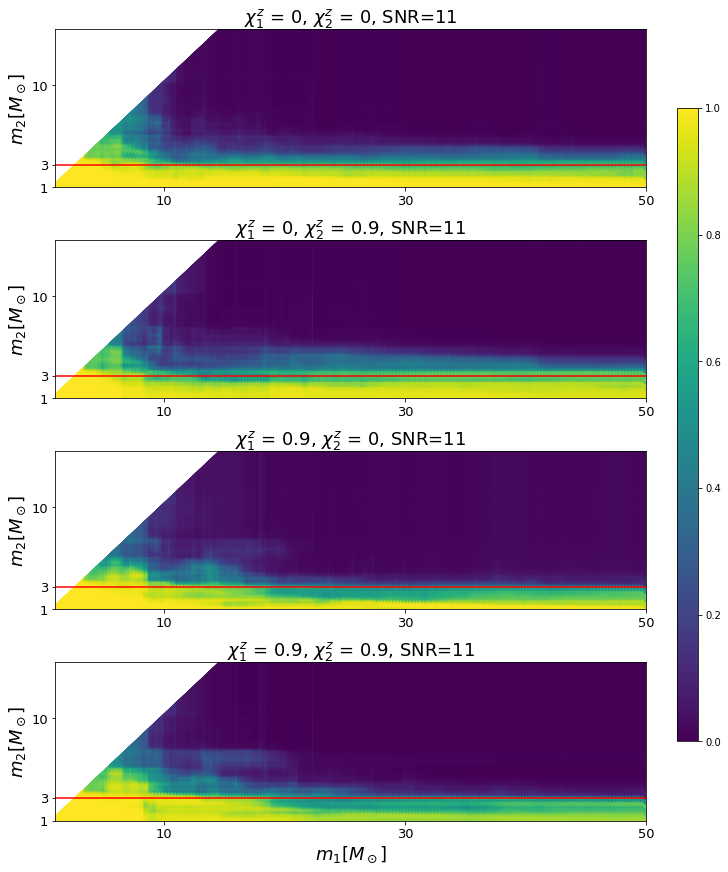

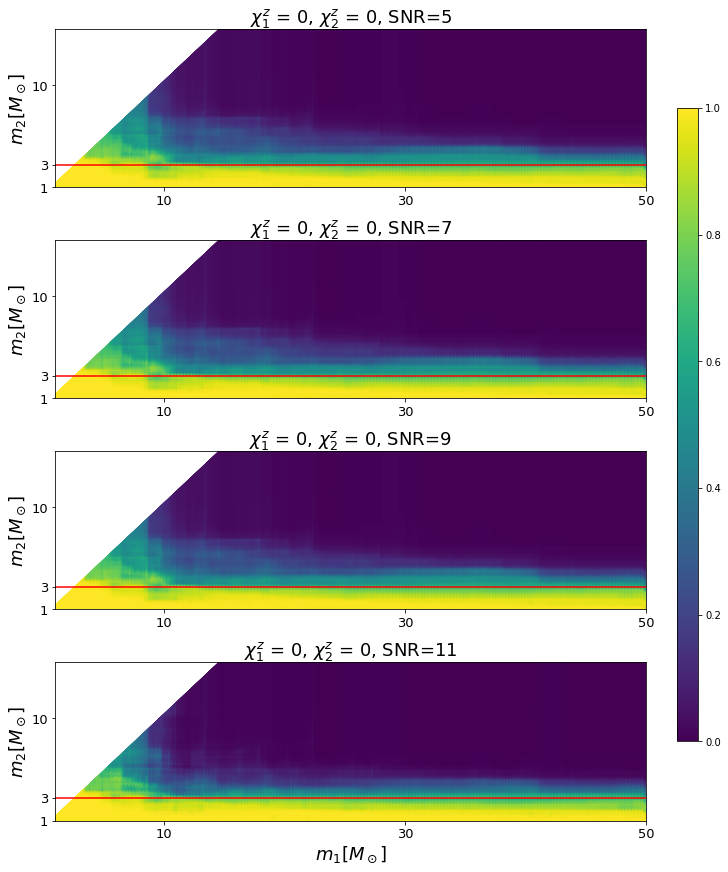

In [65]:
RF.save_plots=True
probLabelDensePlot(RF,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'NS',"3cat_fig4bns")
probLabelDensePlot(RF,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'NS',"3cat_fig6bns")
RF.save_plots=False

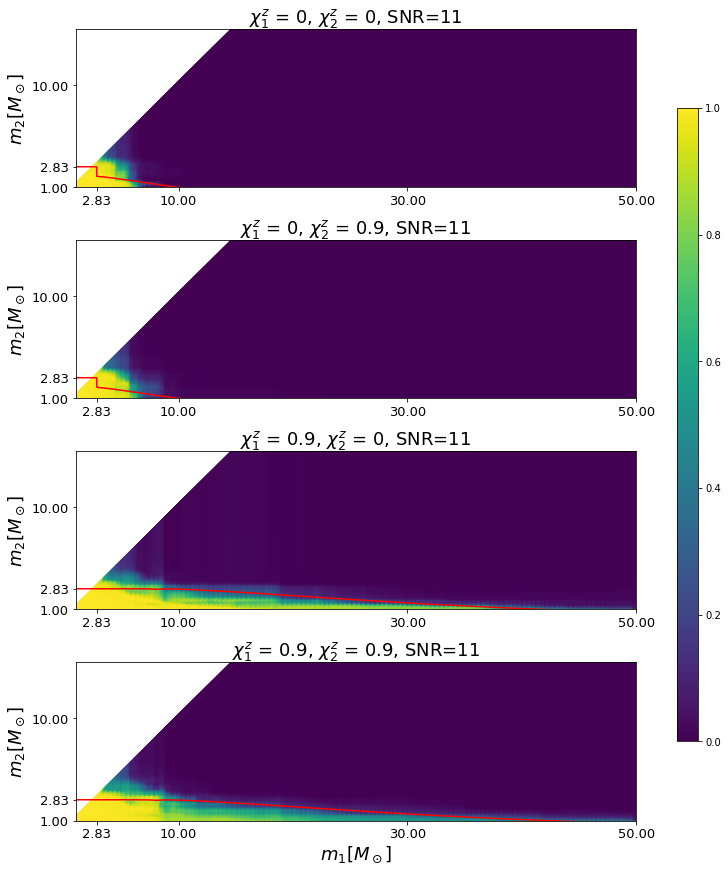

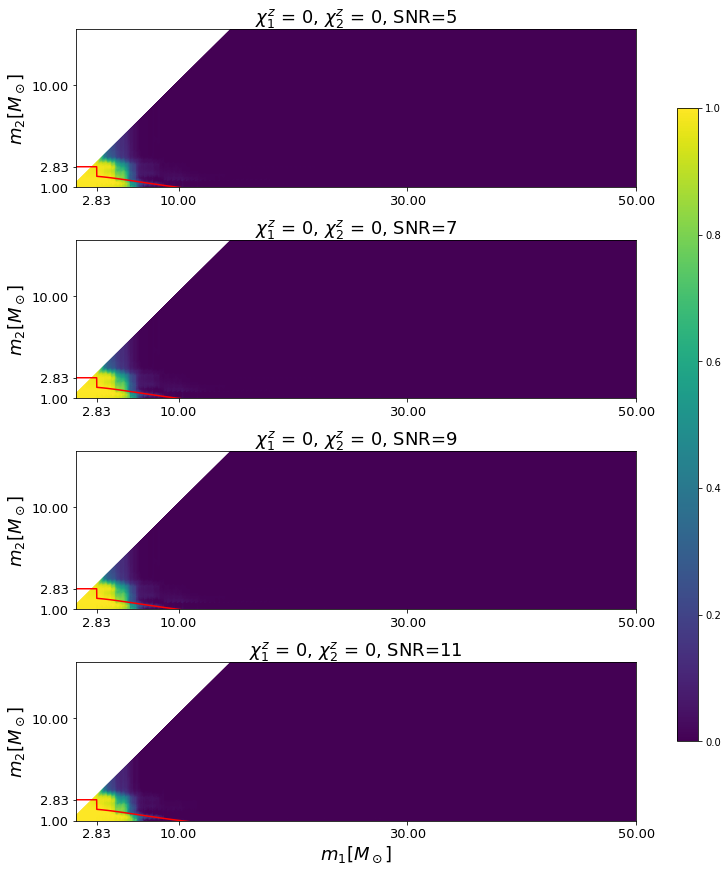

In [66]:
RF.save_plots=True
probLabelDensePlot(RF,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'REM',"3cat_fig4rem")
probLabelDensePlot(RF,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'REM',"3cat_fig6rem")
RF.save_plots=False

## Histograms (fig5)

In [87]:
plt.rcParams["font.size"]=14

In [72]:
def hist_prob_NS(algo, xlabel, legendyes, legendno, figname):
    probs=algo.model.predict_proba(algo.data_test)
    pred=probs[:,1]+probs[:,2]
    truelabel=algo.labels_test
    index_events_has=(np.where((truelabel == 1) | (truelabel == 2)))
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where(truelabel==0)
    p_events_nohas=pred[index_events_nohas]
    
    plt.hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label=legendno)
    plt.hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label=legendyes)
    plt.yscale('log')
    plt.yticks([1e2,1e3,1e4,1e5])
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylim([4.5e1,1.9e5])
    plt.xlabel(xlabel)
    plt.axvline(x=0.5,color='black',ls='--')
    plt.grid(ls='--')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    
    return

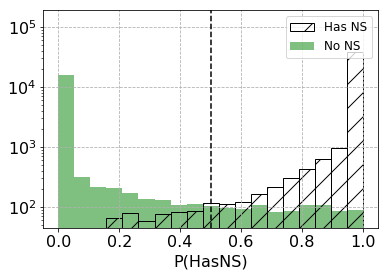

In [74]:
RF.save_plots=True
hist_prob_NS(RF, 'P(HasNS)', 'Has NS', 'No NS', '3cat_histNS')
RF.save_plots=False

In [76]:
def hist_prob_REM(algo, xlabel, legendyes, legendno, figname):
    probs=algo.model.predict_proba(algo.data_test)
    pred=probs[:,2]
    truelabel=algo.labels_test
    index_events_has=np.where(truelabel == 2)
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where((truelabel==0) | (truelabel==1))
    p_events_nohas=pred[index_events_nohas]
    
    plt.hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label=legendno)
    plt.hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label=legendyes)
    plt.yscale('log')
    plt.yticks([1e2,1e3,1e4,1e5])
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylim([4.5e1,1.9e5])
    plt.xlabel(xlabel)
    plt.axvline(x=0.5,color='black',ls='--')
    plt.grid(ls='--')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    
    return

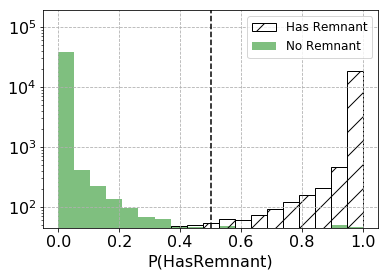

In [79]:
RF.save_plots=True; 
hist_prob_REM(RF, 'P(HasRemnant)', 'Has Remnant', 'No Remnant', '3cat_histREM')
RF.save_plots=False

## ROC curve (fig5)

In [85]:
events_have_NS=np.where((RF.labels_test==1) | (RF.labels_test==2))[0]
print(events_have_NS)


[    0     1     3 ... 59995 59997 59998]


In [86]:
te=[0,1,2]
for t in te:
    if t in events_have_NS:
        print("sip")

sip
sip


In [91]:
def ROC_hasNS(algo,figname):
    allprob = algo.model.predict_proba(algo.data_test)
    v_prob_NS = allprob[:,1] + allprob[:,2]
    events_have_NS = np.where((RF.labels_test==1) | (RF.labels_test==2))[0]
    N = len(events_have_NS)
    M = len(algo.labels_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_NS>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_NS:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        i = i + 1
    
    plt.figure()
    sc=plt.scatter(FP, TP, c=threshold, cmap='viridis')
    plt.colorbar(sc, label="Threshold")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    if algo.save_plots:
        plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return
    

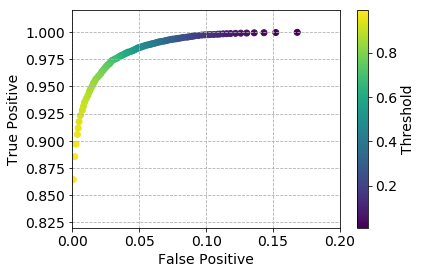

In [93]:
RF.save_plots = True
ROC_hasNS(RF,"3cat_rocNS")

In [94]:
def ROC_hasREM(algo,figname):
    allprob = algo.model.predict_proba(algo.data_test)
    v_prob_REM = allprob[:,2]
    events_have_REM = np.where(RF.labels_test==2)[0]
    N = len(events_have_REM)
    M = len(algo.labels_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_REM>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_REM:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        i = i + 1
    
    plt.figure()
    sc=plt.scatter(FP, TP, c=threshold, cmap='viridis')
    plt.colorbar(sc, label="Threshold")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    if algo.save_plots:
        plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return

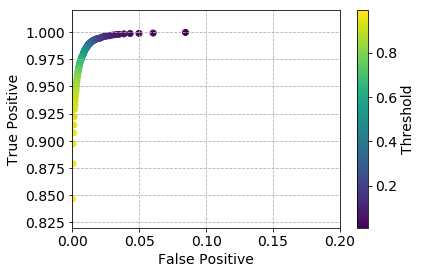

In [96]:
RF.save_plots = True
ROC_hasREM(RF,"3cat_rocREM")
RF.save_plotsots = False

## Histogram and ROC curve together

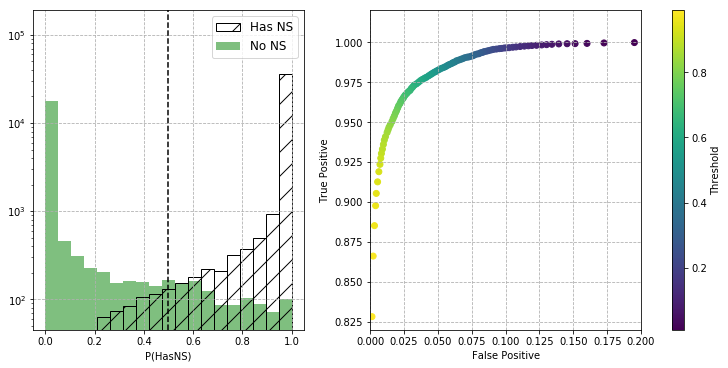

In [103]:
RF.save_plots=True
hist_ROC_NS(RF, 'P(HasNS)', 'Has NS', 'No NS', '3cat_histNS')
#RF.save_plots=False

## Mass distribution data (fig1)

In [286]:
train_inj=RFrem.data_train_all[:,independent_injected_index]
train_rec=RFrem.data_train_all[:,independent_recovered_index]
N=len(train_inj)
countBNS=0
for i in range(0,N):
    if train_inj[i,0]<2 and train_inj[i,1]<2:
        countBNS=countBNS+1
BNSevents=np.zeros((countBNS,3))
BNSevents_rec=np.zeros((countBNS,3))
k=0
for i in range(0,N):
    if train_inj[i,0]<2 and train_inj[i,1]<2:
        BNSevents[k][0]=train_inj[i,0]
        BNSevents[k][1]=train_inj[i,1]
        BNSevents[k][2]=train_inj[i,2]
        BNSevents_rec[k][0]=train_rec[i,0]
        BNSevents_rec[k][1]=train_rec[i,1]
        BNSevents_rec[k][2]=train_rec[i,2]
        k=k+1

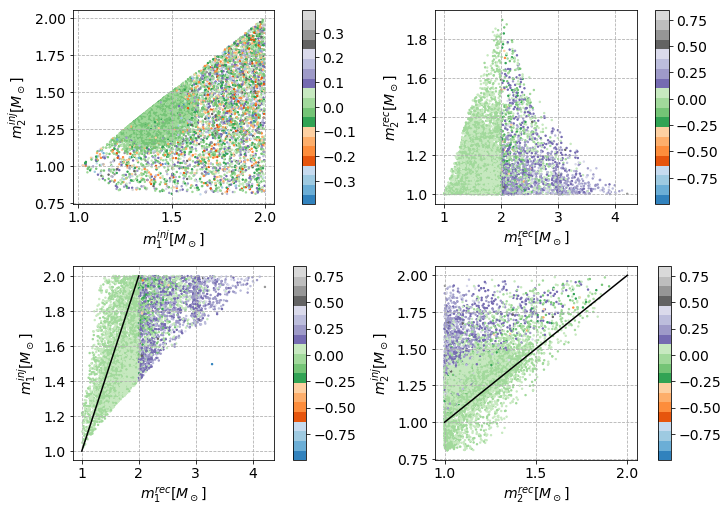

In [300]:
f, (ax) = plt.subplots(2,2,figsize=(10,7),constrained_layout=True)
sc=ax[0,0].scatter(BNSevents[:,0], BNSevents[:,1],c=BNSevents[:,2],cmap="tab20c", s=2)
ax[0,0].grid(ls="--")
f.colorbar(sc, ax=ax[0,0])
ax[0,0].set_xlabel("$m_1^{inj}[M_\odot]$")
ax[0,0].set_ylabel("$m_2^{inj}[M_\odot]$")

sc=ax[0,1].scatter(BNSevents_rec[:,0], BNSevents_rec[:,1],c=BNSevents_rec[:,2],cmap="tab20c", s=2)
ax[0,1].grid(ls="--")
f.colorbar(sc, ax=ax[0,1])
ax[0,1].set_xlabel("$m_1^{rec}[M_\odot]$")
ax[0,1].set_ylabel("$m_2^{rec}[M_\odot]$")

sc=ax[1,0].scatter(BNSevents_rec[:,0], BNSevents[:,0],c=BNSevents_rec[:,2],cmap="tab20c", s=2)
ax[1,0].grid(ls="--")
f.colorbar(sc, ax=ax[1,0])
ax[1,0].set_xlabel("$m_1^{rec}[M_\odot]$")
ax[1,0].set_ylabel("$m_1^{inj}[M_\odot]$")
ax[1,0].plot([1,2],[1,2], c='k')

sc=ax[1,1].scatter(BNSevents_rec[:,1], BNSevents[:,1],c=BNSevents_rec[:,2],cmap="tab20c", s=2)
ax[1,1].grid(ls="--")
f.colorbar(sc, ax=ax[1,1])
ax[1,1].set_xlabel("$m_2^{rec}[M_\odot]$")
ax[1,1].set_ylabel("$m_2^{inj}[M_\odot]$")
ax[1,1].plot([1,2],[1,2], c='k')

plt.savefig("trainM.png",dpi=200,bbox_inches='tight')

## Real observations
event_id,grace_id,m1_rec,m2_rec,chi1_rec,chi2_rec,snr,GWTC

In [4]:
import csv
def extractDataWithStrings(filename, verbose=False):
    """ Reads data from csv file and returns it in array form.
    """
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    return lst

In [5]:
data=extractDataWithStrings(pathClassy+'real_data.csv')
data=np.asarray(data)
data=np.array(data[:,2:-1], dtype=float)

In [6]:
EOS = ["APR4_EPP", "BHF_BBB2", "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1_PP", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLy", "SLY2", "SLY9", "SLY230A"]


In [7]:
lRF = []; probNS=[]; probREM=[]
for eos in EOS:
    RF = classyRF.ClassificationRF()
    RF.loadModel(pathClassy, eos)
    RF.data_test = data
    prob = RF.model.predict_proba(data)
    probns=prob[:,1]+prob[:,2]
    probrem=prob[:,2]
    probNS.append(probns)
    probREM.append(probrem)
    lRF.append(RF)


loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\APR4_EPP.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\BHF_BBB2.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\H4.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\HQC18.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\KDE0V.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\KDE0V1.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\MPA1.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\MS1_PP.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\MS1B_PP.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\RS.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\SK255.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\SK272.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\SKI2.joblib
loading  C:\Users\marin\Desktop\ML_workingGroup\classy_RF\SKI3.joblib
loadi

In [9]:
weights=[1.526, 1.555, 0.056, 1.422, 1.177, 1.283, 0.276, 0.001, 0.009, 0.176, 0.179, 0.159, 0.108, 0.107, 0.33, 0.025, 0.288, 0.29, 0.618, 1.0, 1.028, 0.37, 0.932]

In [ ]:
dem = sum(weights)

In [29]:
weighted=[]
print("Predictions real data p(HasNS)")
for i in range(len(weights)):
    weighted.append(weights[i]*probNS[i])
for k in range(0,len(probNS[0])):
    suma = 0
    for i in range(len(probNS)):
        suma = suma + weighted[i][k]
    suma = suma/dem
    print("{:.3f}".format(suma))

Predictions real data p(HasNS)
0.000
1.000
0.001
0.001
0.000
0.000
0.000
0.000
0.000
1.000
0.996
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.005
0.000
0.000
0.003
0.009
0.001
0.116
0.000
0.001
0.000
0.045
0.002
0.000
0.002
0.001
0.000
0.001
0.000
0.003
1.000
0.000
0.000
0.011
0.000
0.000
0.000
0.002
0.002


In [30]:
weighted=[]
print("Predictions real data p(HasREM)")
for i in range(len(weights)):
    weighted.append(weights[i]*probREM[i])
for k in range(0,len(probNS[0])):
    suma = 0
    for i in range(len(probNS)):
        suma = suma + weighted[i][k]
    suma = suma/dem
    print("{:.3f}".format(suma))

Predictions real data p(HasREM)
0.000
1.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.999
0.009
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.002
0.000
0.000
0.000
0.000
0.000
0.000
0.000
0.000


2.059620596205962e-05
1.0
0.0006059620596205961
0.0009853658536585364
0.0
0.0
0.0
0.00039070847851335657
0.0
1.0
0.9963798683701122
0.00022702284165698798
2.4622531939605112e-05
0.0
0.0
0.0001551684088269454
0.0
0.0001551684088269454
0.0
0.004856368563685636
0.00019945799457994577
4.305071622144793e-05
0.002659233449477352
0.009457530003871466
0.0005276035617499032
0.11616229190863335
3.097173828881146e-06
0.0005833526906697638
0.0004384049554781262
0.044771506000774286
0.0016610143244289585
5.29616724738676e-05
0.0017073170731707315
0.0006960898180410374
0.00045729771583430124
0.0006871080139372822
4.305071622144793e-05
0.0029506775067750677
0.9998389469608984
0.000408052651955091
0.00022531939605110337
0.010538753387533873
0.0003021293070073558
0.00023631436314363143
0.00024281842818428182
0.0015075493612078977
0.0022583042973286873


In [100]:
pred=RF.compute_prediction(data)
print(pred)

[0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [101]:
prob=RF.model.predict_proba(data)
probNS=prob[:,1]+prob[:,2]
probREM=prob[:,2]

In [102]:
for k in range(0,len(probNS)):
    print(probNS[k])

0.002
1.0
0.006
0.0
0.0
0.0
0.0
0.002
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.002
0.0
0.0
0.002
0.0
0.01
0.02
0.0
0.734
0.002
0.0
0.0
0.29
0.01
0.0
0.08
0.002
0.0
0.022
0.0
0.0
1.0
0.0
0.0
0.01
0.006
0.0
0.0
0.004
0.006


In [103]:
for k in range(0,len(probREM)):
    print(probREM[k])

0.002
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.236
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.052
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


## Checking numbers with SNR

In [15]:
print(RF.model.predict_proba(np.array([2.5,2,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([2.5,2,0,0,20]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([10,6,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([10,6,0,0,20]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([42,2.7,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([42,2.7,0,0,20]).reshape(1, -1)))

[[0. 0. 1.]]
[[0.    0.002 0.998]]
[[0.562 0.438 0.   ]]
[[0.76 0.24 0.  ]]
[[0.204 0.796 0.   ]]
[[0.22  0.778 0.002]]


In [16]:
print(RF.model.predict_proba(np.array([2.5,2,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([2.5,2,0,0,20]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([3.4,2.83,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([3.4,2.83,0,0,20]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([8,1.1,0,0,5]).reshape(1, -1)))
print(RF.model.predict_proba(np.array([8,1.1,0,0,20]).reshape(1, -1)))

[[0. 0. 1.]]
[[0.    0.002 0.998]]
[[0.002 0.02  0.978]]
[[0.004 0.068 0.928]]
[[0.    0.978 0.022]]
[[0.    0.988 0.012]]


# Do it all loop

In [5]:
EOS = ["APR4_EPP", "BHF_BBB2", "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1_PP", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLy", "SLY2", "SLY9", "SLY230A"]

random.seed(42)
plt.rcParams["font.size"]=14

In [6]:
def hist_ROC_NS(algo, figname):
    probs=algo.model.predict_proba(algo.data_test)
    pred=probs[:,1]+probs[:,2]
    truelabel=algo.labels_test
    index_events_has=(np.where((truelabel == 1) | (truelabel == 2)))
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where(truelabel==0)
    p_events_nohas=pred[index_events_nohas]
    
    
    allprob = algo.model.predict_proba(algo.data_test)
    v_prob_NS = allprob[:,1] + allprob[:,2]
    events_have_NS = np.where((RF.labels_test==1) | (RF.labels_test==2))[0]
    N = len(events_have_NS)
    M = len(algo.labels_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_NS>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_NS:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        i = i + 1
    
    
    
    f, (ax) = plt.subplots(1,2,figsize=(10, 5),constrained_layout=True)
    
    ax[0].hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label='No NS')
    ax[0].hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label='Has NS')
    ax[0].set_yscale('log')
    ax[0].set_yticks([1e2,1e3,1e4,1e5])
    ax[0].set_xticks([0,0.2,0.4,0.6,0.8,1])
    ax[0].set_ylim([4.5e1,1.9e5])
    ax[0].set_xlabel('P(HasNS)')
    ax[0].axvline(x=0.5,color='black',ls='--')
    ax[0].grid(ls='--')
    handles, labels = ax[0].get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)
    
    
    sc=ax[1].scatter(FP, TP, c=threshold, cmap='viridis')
    f.colorbar(sc,ax=ax[1], label="Threshold", aspect=50)
    ax[1].set_xlabel("False Positive")
    ax[1].set_ylabel("True Positive")
    ax[1].grid(ls='--')
    ax[1].set_ylim([0.82,1.02])
    ax[1].set_xlim([0,0.2])
    ax[1].set_yticks(np.linspace(0.825,1,8))
    
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return


def hist_ROC_REM(algo, figname):
    probs=algo.model.predict_proba(algo.data_test)
    pred=probs[:,2]
    truelabel=algo.labels_test
    index_events_has=np.where(truelabel == 2)
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where((truelabel==0) | (truelabel==1))
    p_events_nohas=pred[index_events_nohas]
    
    
    allprob = algo.model.predict_proba(algo.data_test)
    v_prob_REM = allprob[:,2]
    events_have_REM = np.where(RF.labels_test==2)[0]
    N = len(events_have_REM)
    M = len(algo.labels_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_REM>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_REM:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        i = i + 1
    
    
    
    f, (ax) = plt.subplots(1,2,figsize=(10, 5),constrained_layout=True)
    
    ax[0].hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label='No Remnant')
    ax[0].hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label='Has Remnant')
    ax[0].set_yscale('log')
    ax[0].set_yticks([1e2,1e3,1e4,1e5])
    ax[0].set_xticks([0,0.2,0.4,0.6,0.8,1])
    ax[0].set_ylim([4.5e1,1.9e5])
    ax[0].set_xlabel('P(HasRemnant)')
    ax[0].axvline(x=0.5,color='black',ls='--')
    ax[0].grid(ls='--')
    handles, labels = ax[0].get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)
    
    
    sc=ax[1].scatter(FP, TP, c=threshold, cmap='viridis')
    f.colorbar(sc,ax=ax[1], label="Threshold", aspect=50)
    ax[1].set_xlabel("False Positive")
    ax[1].set_ylabel("True Positive")
    ax[1].grid(ls='--')
    ax[1].set_ylim([0.82,1.02])
    ax[1].set_xlim([0,0.2])
    ax[1].set_yticks(np.linspace(0.825,1,8))
    
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return


Doing APR4_EPP
loaded
198961 total events
59688 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


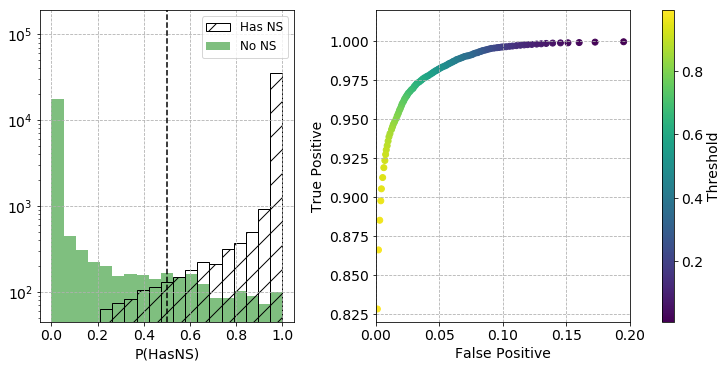

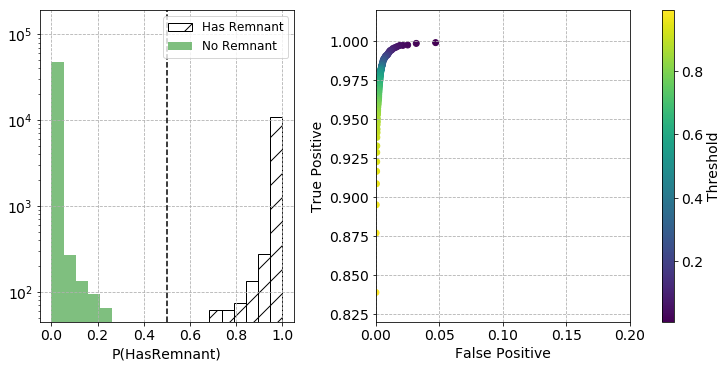

Doing BHF_BBB2
loaded
193624 total events
58087 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


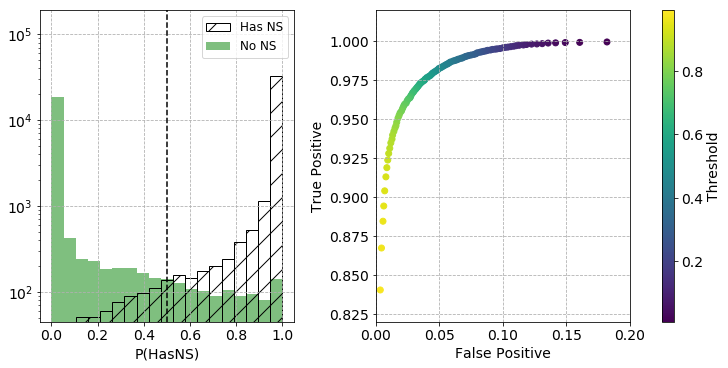

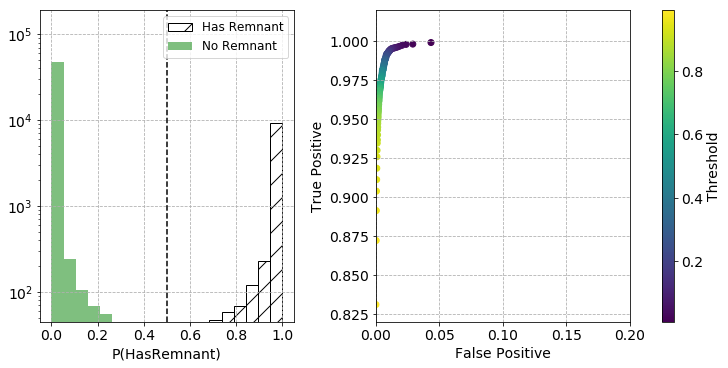

Doing H4
loaded
195764 total events
58729 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


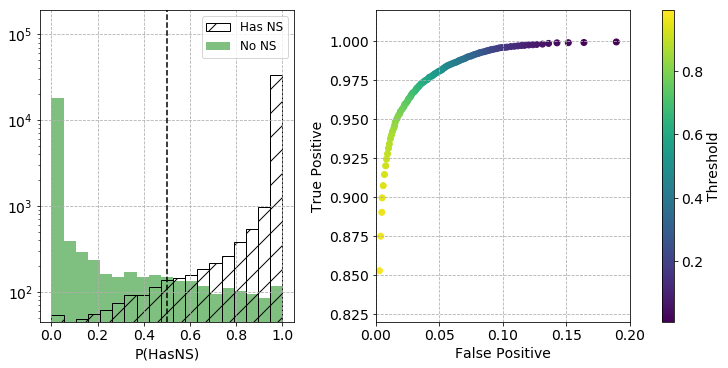

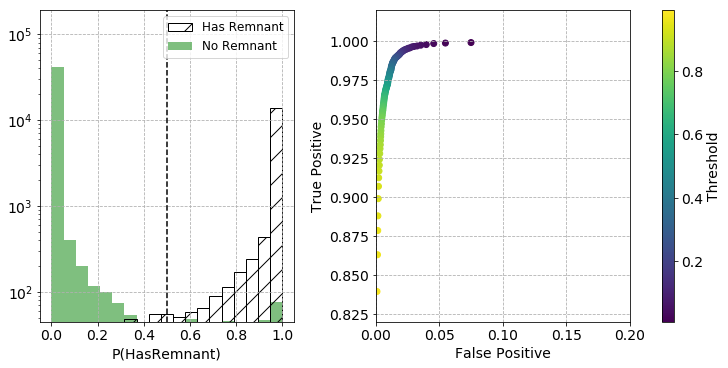

Doing HQC18
loaded
196070 total events
58821 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


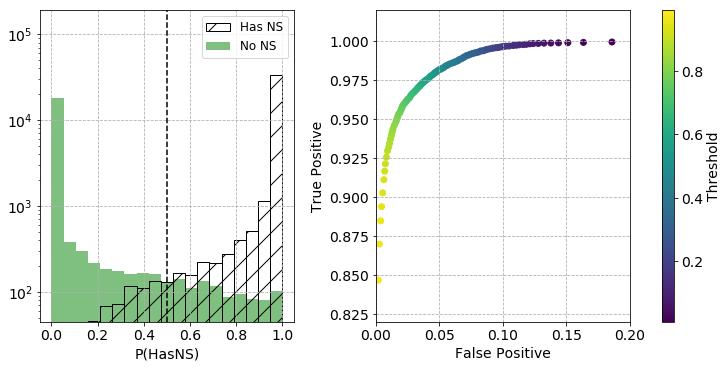

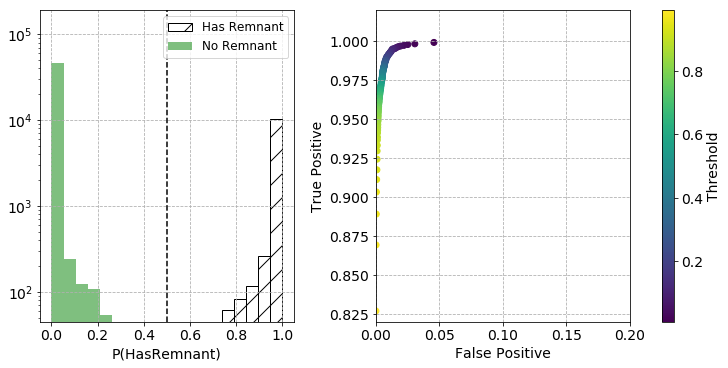

Doing KDE0V
loaded
194264 total events
58279 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


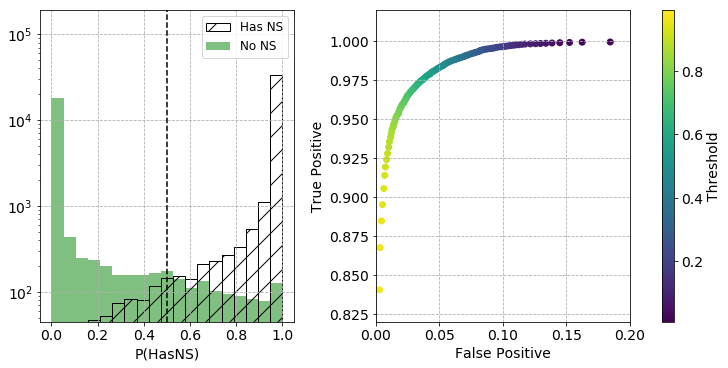

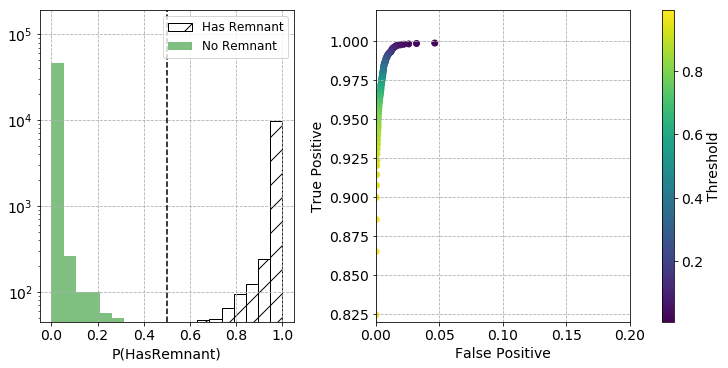

Doing KDE0V1
loaded
194434 total events
58330 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


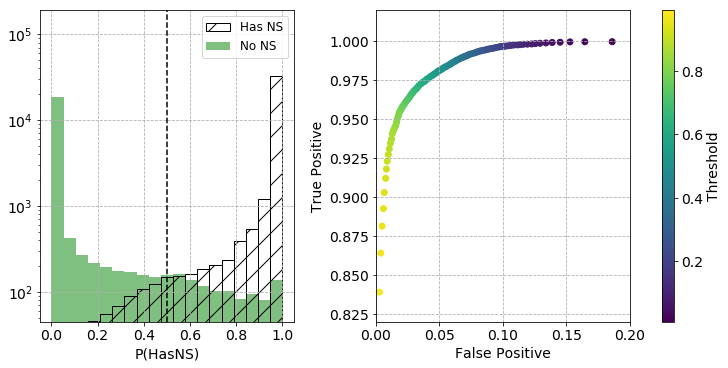

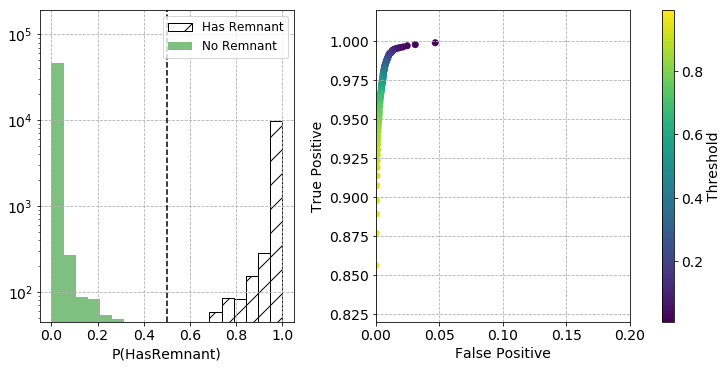

Doing MPA1
loaded
203407 total events
61022 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


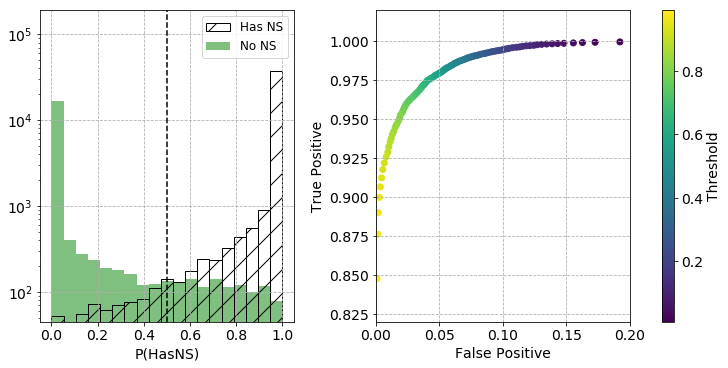

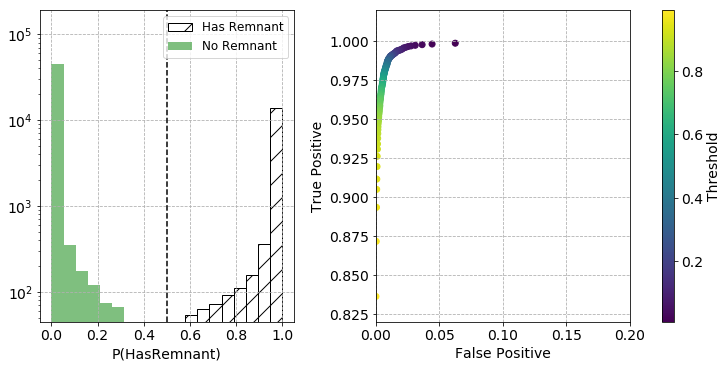

Doing MS1_PP
loaded
203407 total events
61022 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


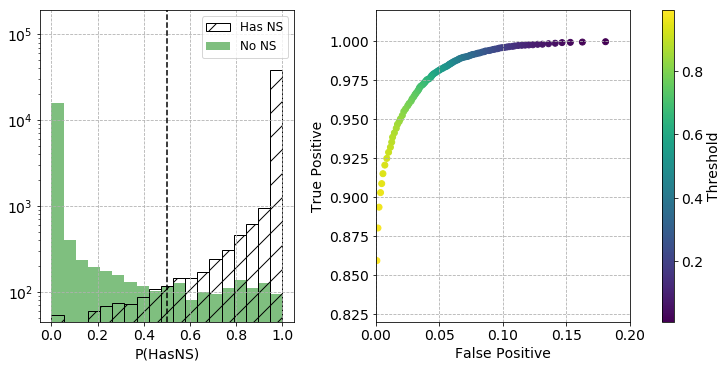

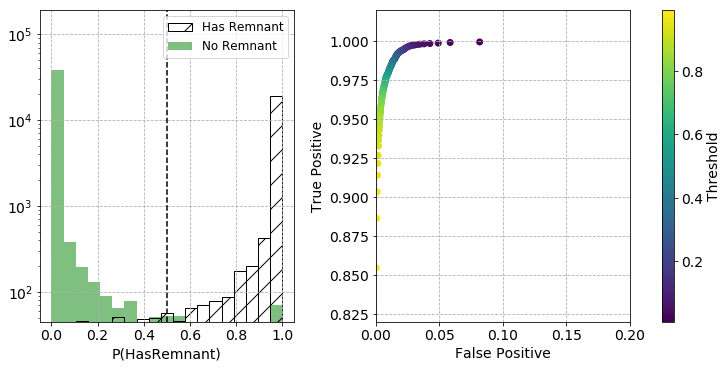

Doing MS1B_PP
loaded
203407 total events
61022 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


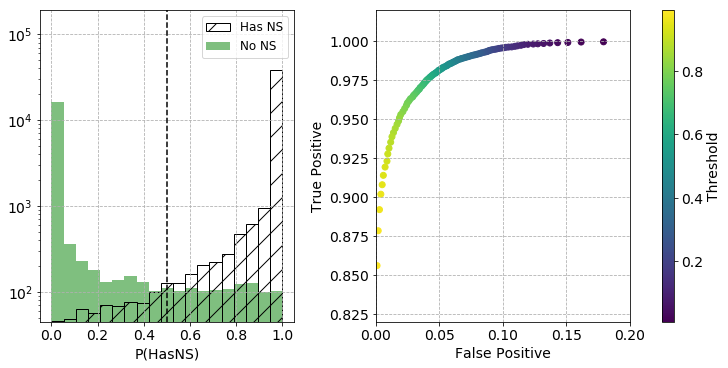

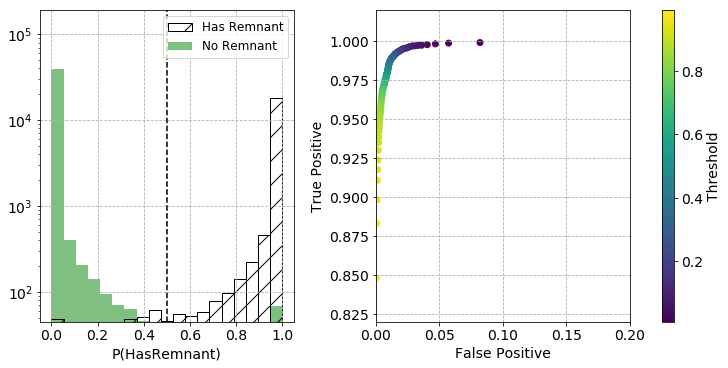

Doing RS
loaded
197789 total events
59336 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


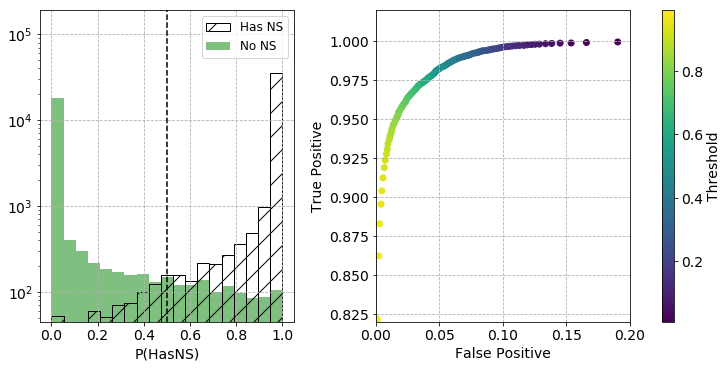

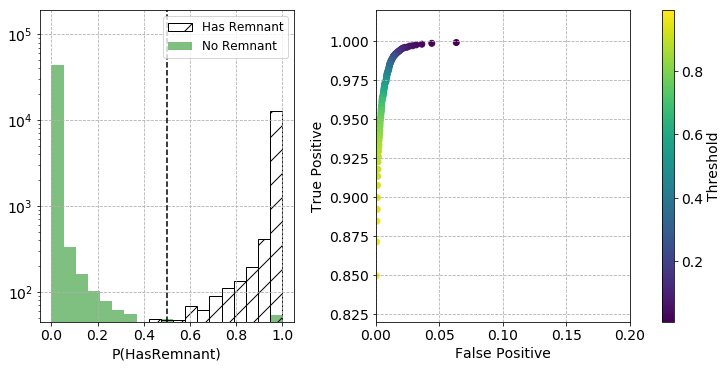

Doing SK255
loaded
198532 total events
59559 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


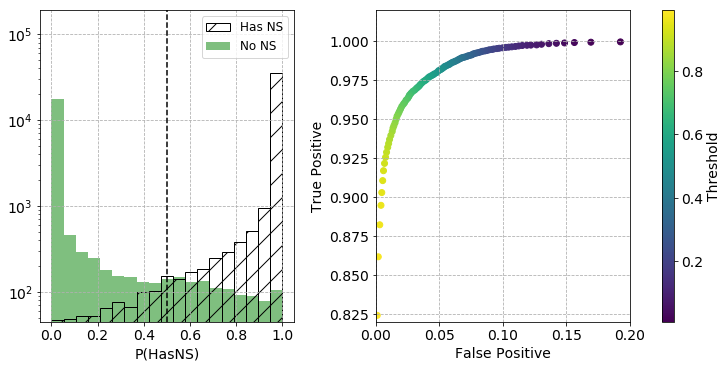

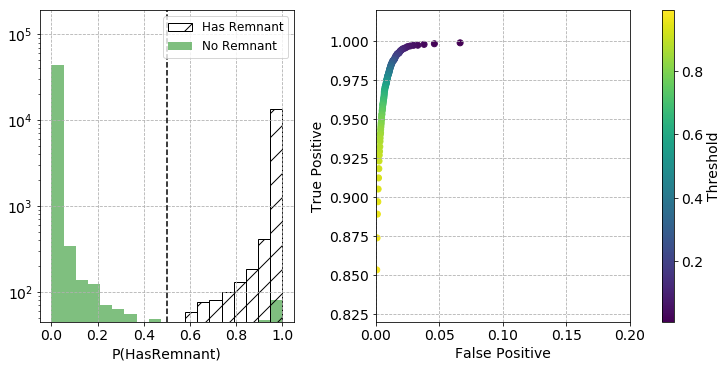

Doing SK272
loaded
201120 total events
60336 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


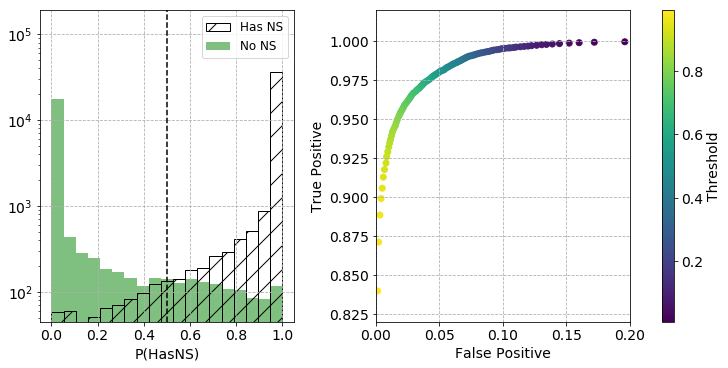

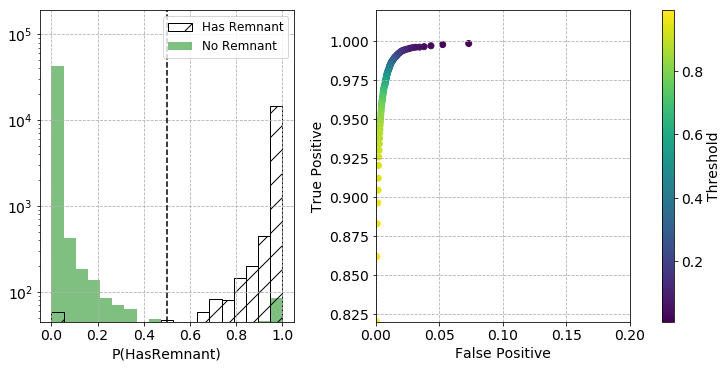

Doing SKI2
loaded
199062 total events
59718 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


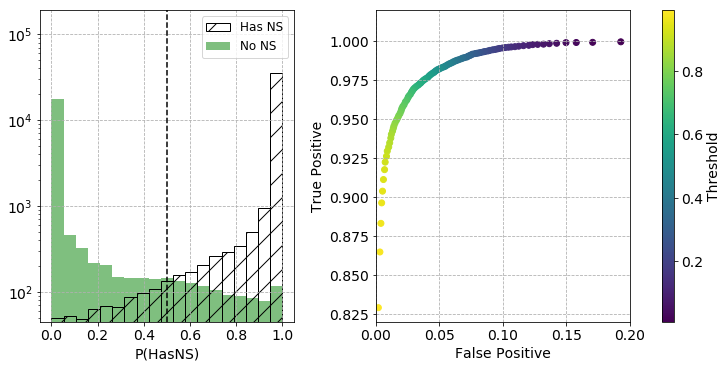

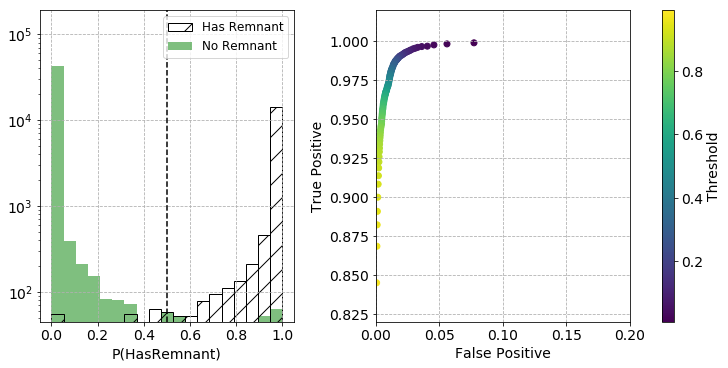

Doing SKI3
loaded
201373 total events
60411 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


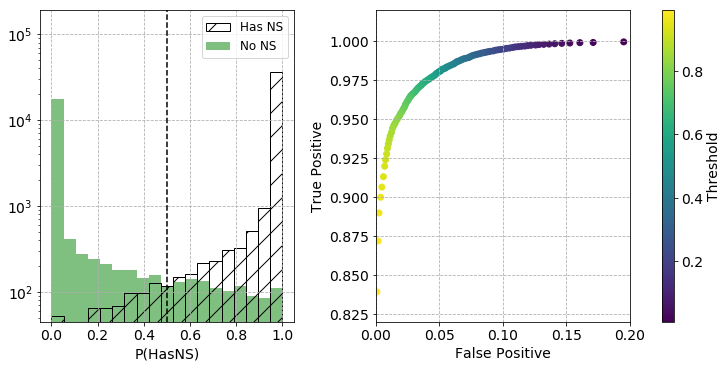

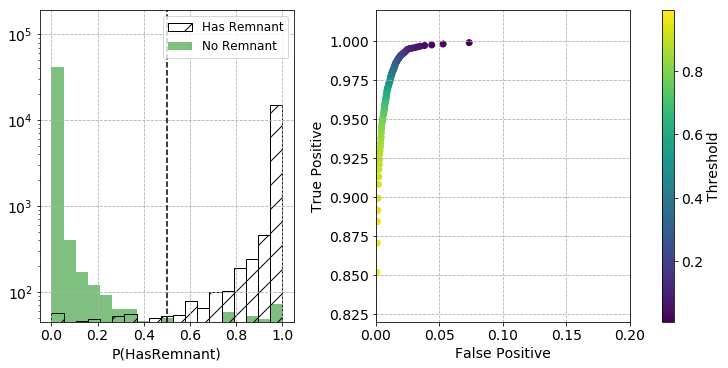

Doing SKI4
loaded
199255 total events
59776 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


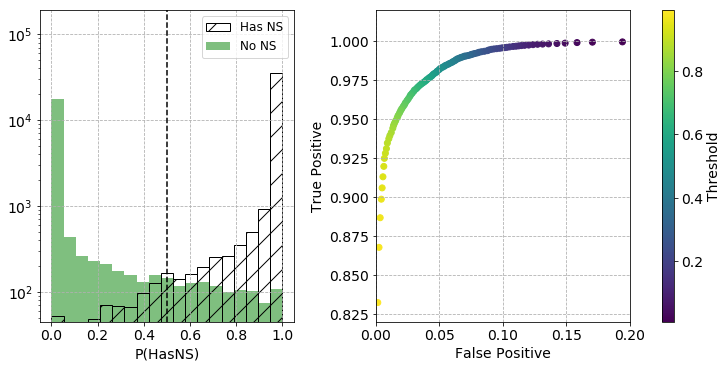

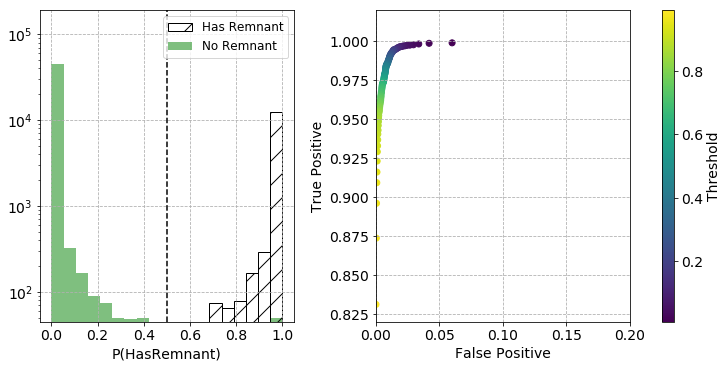

Doing SKI5
loaded
201373 total events
60411 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


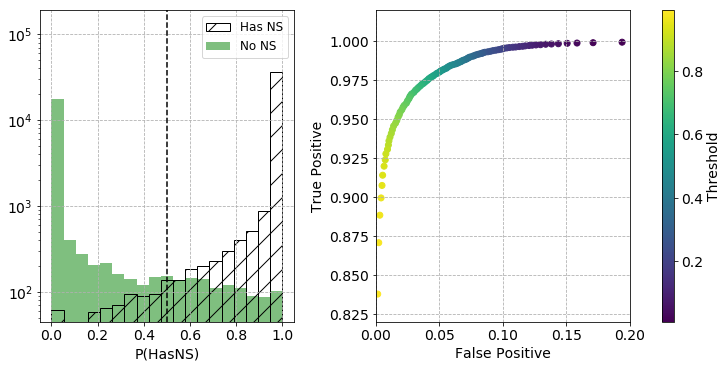

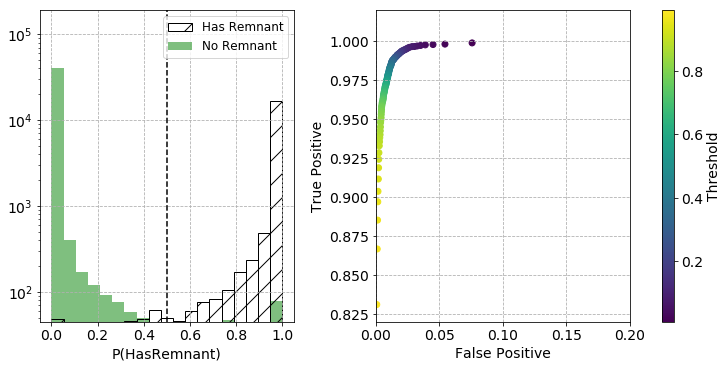

Doing SKI6
loaded
199821 total events
59946 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


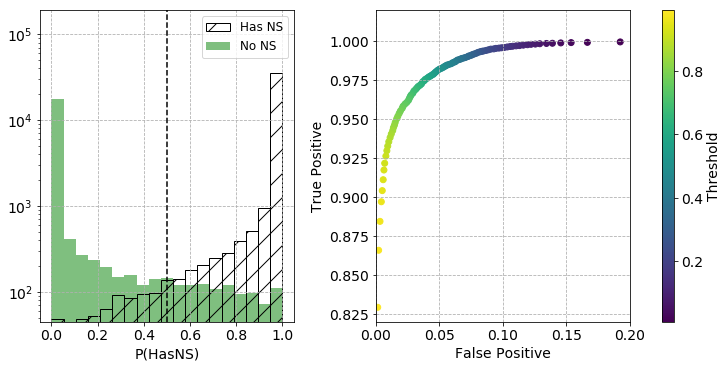

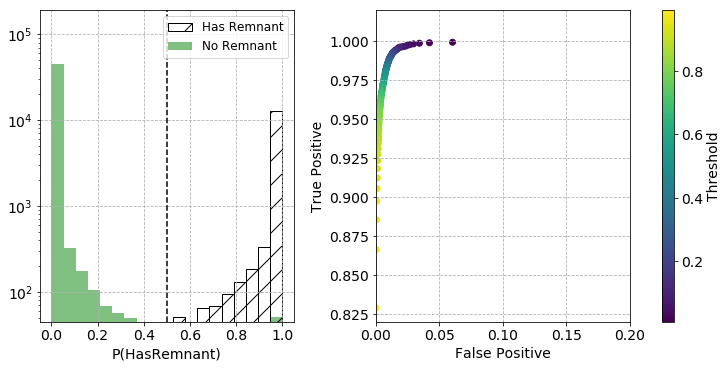

Doing SKMP
loaded
197566 total events
59269 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


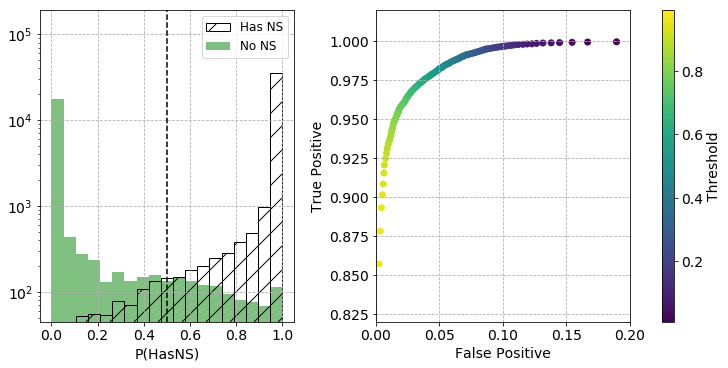

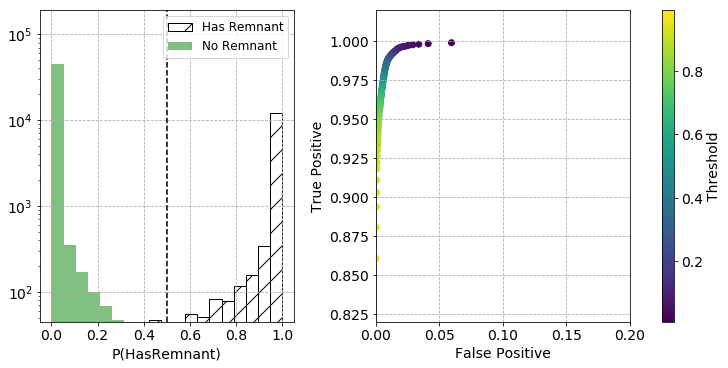

Doing SKOP
loaded
194522 total events
58356 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


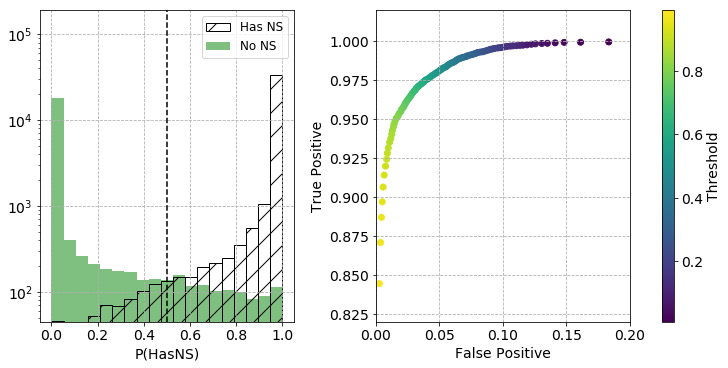

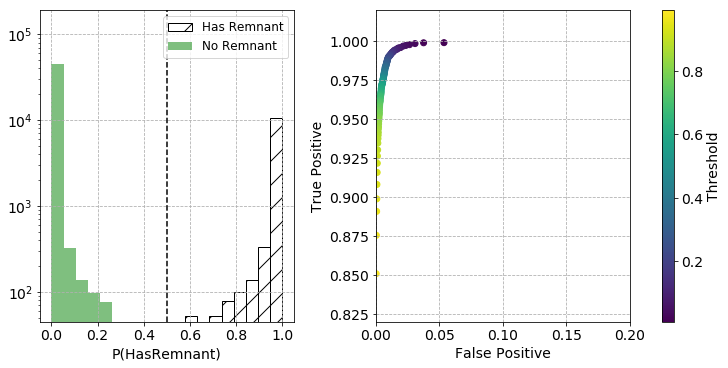

Doing SLy
loaded
196264 total events
58879 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


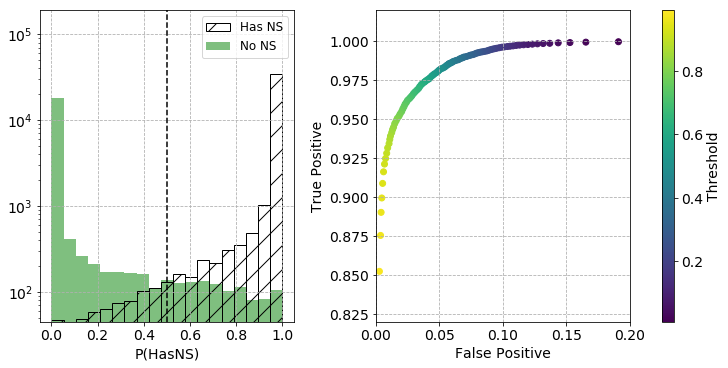

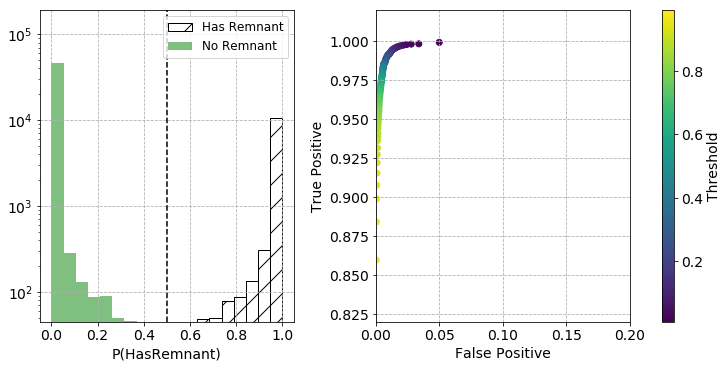

Doing SLY2
loaded
196264 total events
58879 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


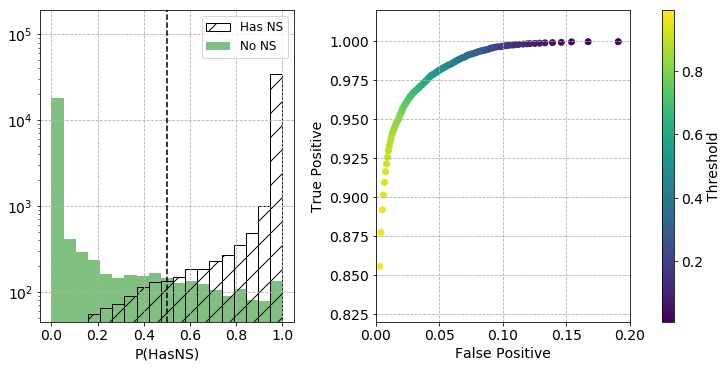

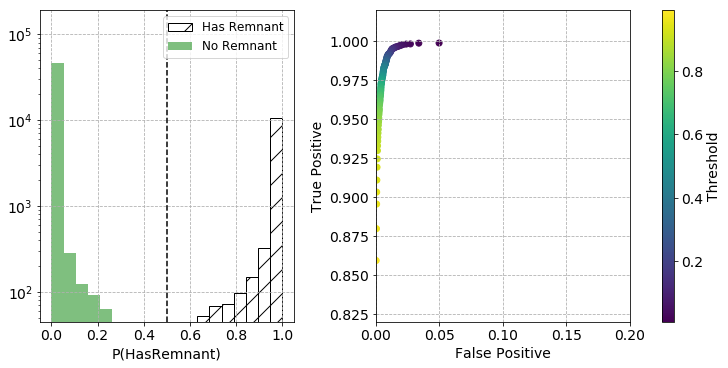

Doing SLY9
loaded
198883 total events
59664 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


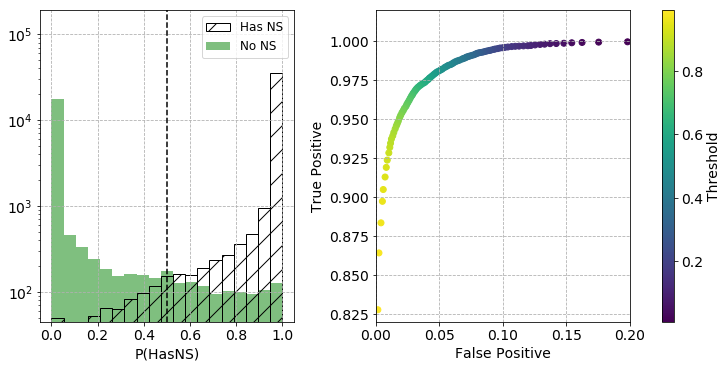

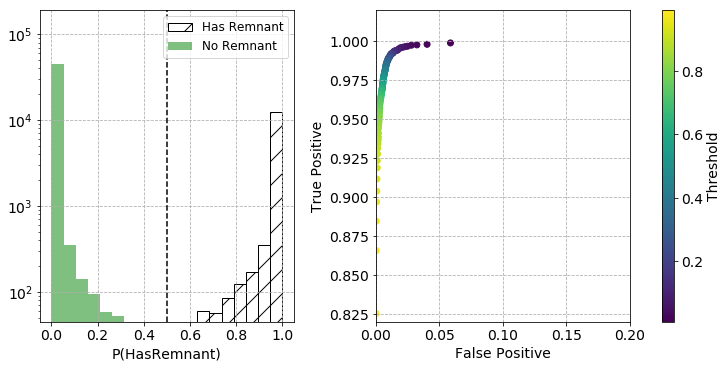

Doing SLY230A
loaded
197359 total events
59207 events for testing
Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
Compactness_inj


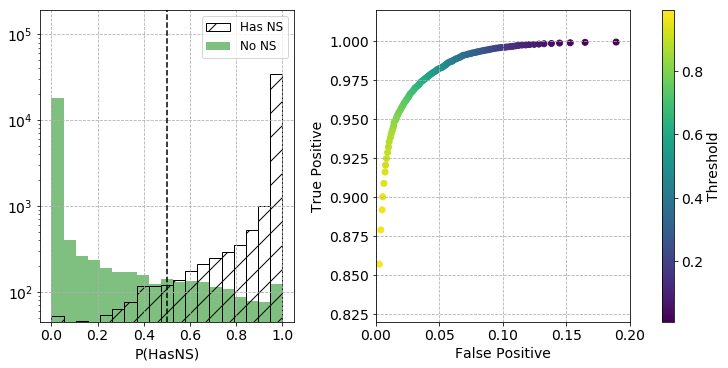

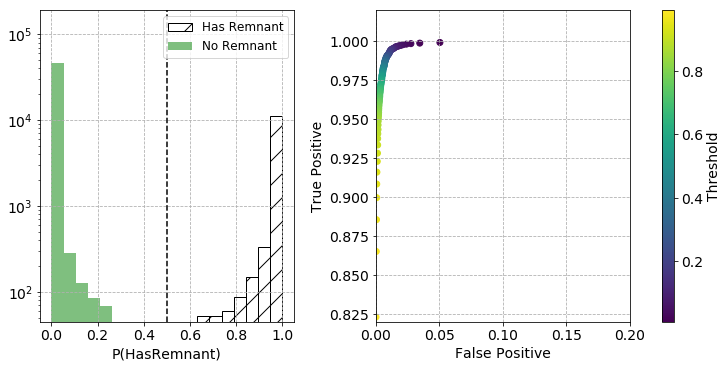

[0.9645824956440155, 0.9631070635426171, 0.9575678114730372, 0.9622243756481529, 0.9632972425745122, 0.9615120864049375, 0.9605715971289043, 0.9591131067483858, 0.9597030579135394, 0.9600579749224754, 0.9586796286035696, 0.958499071864227, 0.9580026122777052, 0.9562496896260615, 0.9614059154175589, 0.9577394845309629, 0.9611817302238681, 0.9613288565692014, 0.9609637398039619, 0.962754122862141, 0.9621426994344333, 0.9608306516492358, 0.963534717178712]


In [7]:
score_list=[]
for eos in EOS:
    print("Doing", eos)
    RF = classyRF.ClassificationRF()
    RF.load_original_dataset(pathData, fname_x='original_data_'+eos+'_s300_f0d7.csv')

    N=int(len(RF.data_train_all));print(N, "total events")
    test_N=int(np.floor(0.3*N)); print(test_N, "events for testing")

    indexes_test=random.sample(list(np.arange(0,N)), test_N);
    all_indexes=(np.arange(0,N)).tolist()
    indexes_train=list(set(all_indexes) - set(indexes_test))


    labelREM=RF.data_train_all[indexes_train,-1]
    labelBNS=RF.data_train_all[indexes_train,-2]
    RF.labels_train = labelREM+labelBNS

    RF.data_test_all=RF.data_train_all[indexes_test,0:-2]
    labelREM=RF.data_train_all[indexes_test,-1]
    labelBNS=RF.data_train_all[indexes_test,-2]
    RF.labels_test = labelREM+labelBNS

    RF.data_train_all=RF.data_train_all[indexes_train,0:-2]
    
    RF.subset_features(independent_recovered_index)
    RF.train(500, 'entropy', 'sqrt')
    RF.saveModel(pathClassy, eos)
    
    score_list.append(RF.model.score(RF.data_test,RF.labels_test))
    
    RF.save_plots = True
    hist_ROC_NS(RF,eos+"_hist_ROC_NS")
    hist_ROC_REM(RF,eos+"_hist_ROC_REM")

print(score_list)